## Nuevo proyecto

In [1]:
import pandas as pd

# Leer el archivo Excel
file_path = 'Intencion_Emprendedora_Combinada.xlsx'
df = pd.read_excel(file_path)

# Mostrar las primeras filas del dataframe
df.head()

,Fecha,Consentimiento datos,Semestre,Edad,Género,Estado Civil,Escolaridad Madre,Escolaridad Padre,Detección Oportunidades,Cumplimiento Deberes,...,Intención de Emprender,Oportunidades Universitarias,Liderazgo Universitario,Herramientas de Planificación,Creatividad e Innovación,Análisis y Riesgo,Contactos Universitarios,Motivación al Emprendimiento,Trabajo Madre,Trabajo Padre
0,2021-04-12 10:52:37.403,Si,X,28,M,C(a),Secundaria,Superior,Muy de acuerdo,Muy de acuerdo,...,Muy de acuerdo,Muy de acuerdo,De Acuerdo,De Acuerdo,De Acuerdo,De Acuerdo,Muy de acuerdo,Muy de acuerdo,NaN,NaN
1,2021-04-13 16:45:36.891,Si,V,26,M,C(a),Superior,Maestria,Totalmente acuerdo,Muy de acuerdo,...,Muy de acuerdo,Muy de acuerdo,De Acuerdo,De Acuerdo,De Acuerdo,De Acuerdo,Muy de acuerdo,Muy de acuerdo,NaN,NaN
2,2021-04-13 18:44:19.589,Si,X,28,F,S(a),Superior,Pos Graduado,Muy en Desacuerdo,Muy en Desacuerdo,...,Muy en Desacuerdo,Totalmente en Desacuerdo,Totalmente en Desacuerdo,Muy en Desacuerdo,Muy en Desacuerdo,Muy en Desacuerdo,Muy en Desacuerdo,Muy en Desacuerdo,NaN,NaN
3,2021-04-13 18:52:13.541,Si,III,35,F,C(a),Secundaria,Superior,Totalmente en Desacuerdo,Totalmente en Desacuerdo,...,Muy en Desacuerdo,Totalmente en Desacuerdo,Totalmente en Desacuerdo,Muy en Desacuerdo,En Desacuerdo,Muy en Desacuerdo,Muy en Desacuerdo,En Desacuerdo,NaN,NaN
4,2021-04-13 19:07:40.046,Si,IX,23,F,S(a),Pos Graduado,Pos Graduado,Muy de acuerdo,Muy de acuerdo,...,Muy de acuerdo,Muy de acuerdo,Muy de acuerdo,Muy de acuerdo,De Acuerdo,De Acuerdo,No lo sé,No lo sé,NaN,NaN


In [2]:
df.isna().sum().sort_values()


Mejora Convencional                0
Análisis y Riesgo                  0
Creatividad Proyectos              0
Asumir Deuda                       0
Riesgos por Beneficios             0
Decisiones y Confort               0
Riesgos Impactantes                0
Importancia Contactos              0
Conexiones Profesionales           0
Relacionarse Fácilmente            0
Contacto Constante                 0
Actitud Emprendedora               0
Compromiso Empresarial             0
Sueño Empresarial                  0
Logro de Negocio                   0
Intención de Emprender             0
Oportunidades Universitarias       0
Liderazgo Universitario            0
Cambio de Trabajo                  0
Herramientas de Planificación      0
Trabajo Novedoso                   0
Establecimiento Metas              0
Motivación al Emprendimiento       0
Contactos Universitarios           0
Edad                               0
Género                             0
Estado Civil                       0
E

<Axes: >

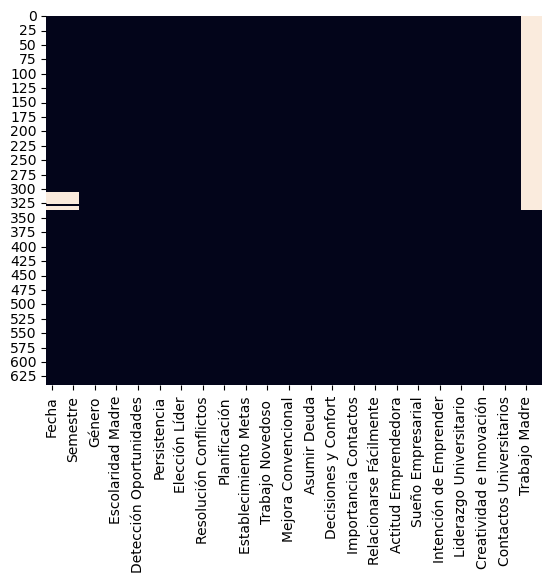

In [3]:
import seaborn as sns
sns.heatmap(df.isnull(), cbar=False)

In [4]:
# Primero, eliminamos columnas con más del 50% de datos nulos
df = df.dropna(axis=1, thresh=int(0.5 * df.shape[0]))

# Ahora, eliminamos las columnas específicas por nombre
columns_to_drop = ['Fecha', 'Semestre', 'Consentimiento  datos', 'Trabajo Madre', 'Trabajo Padre','Escolaridad Madre','Escolaridad Padre','Edad','cluster_label']
df = df.drop(columns=columns_to_drop, errors='ignore')  # errors='ignore' para evitar errores si alguna columna no existe

<Axes: >

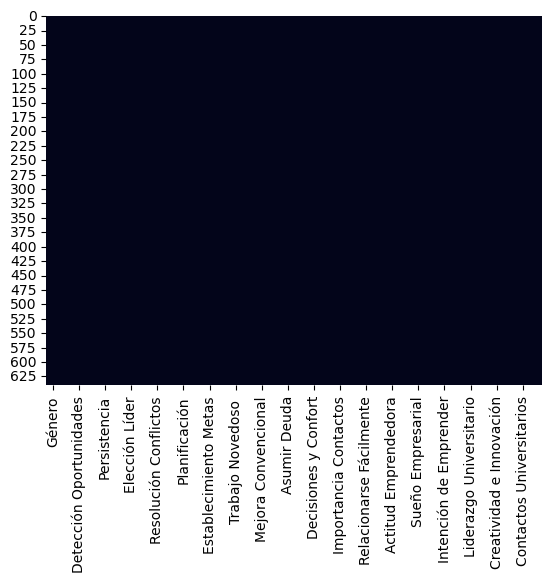

In [5]:
# Verificación final del DataFrame resultante
sns.heatmap(df.isnull(), cbar=False)

In [6]:
mapeo_valores = {
     'Totalmente de acuerdo': 12,
    'Totalmente acuerdo': 11,
    'Totalmente\xa0acuerdo':11,
    'Muy de acuerdo': 10,
    'Muy de acuerdo':10,
    'Muy de\xa0acuerdo':10,
     'Muy de\xa0acuerdo':10,
    'De acuerdo': 9,
    'De Acuerdo': 8,
    'No lo sé': 7,
    'En desacuerdo': 6,
    'En Desacuerdo': 5,
    'Muy de Desacuerdo': 4,
    'Muy en\xa0Desacuerdo': 4,
    'En total Desacuerdo': 2,
    'En total desacuerdo':2,
    'Totalmente en\xa0Desacuerdo':1,
    'Totalmente en Desacuerdo': 0

}

# Recorrer cada columna del DataFrame
for columna in df.columns:
    # Recorrer cada fila de la columna
    for indice, valor in df[columna].items():
        # Reemplazar el valor según el mapeo
        df.at[indice, columna] = mapeo_valores.get(valor, valor)

In [7]:
# Definir un diccionario de mapeo para los reemplazos
mapeo_valores = {
    'Otros': 0,
    'Outro (especifique)': 1,
    'Casado': 2,
    'C(a)': 2,
    'D':3,
    'Separado': 3,
    'S(a)': 4,
    'Soltero': 4
}

# Recorrer cada columna del DataFrame
for columna in df.columns:
    # Recorrer cada fila de la columna
    for indice, valor in df[columna].items():
        # Reemplazar el valor según el mapeo
        df.at[indice, columna] = mapeo_valores.get(valor, valor)

# Reemplazar valores en la columna 'Género'
df['Género'] = df['Género'].replace({'Femenino': 1, 'Masculino': 0,'M':1,'F':0})


In [8]:
df

,Género,Estado Civil,Detección Oportunidades,Cumplimiento Deberes,Persistencia,Soluciones Creativas,Elección Líder,Respeto Opinión,Resolución Conflictos,Capacidad Motivación,...,Sueño Empresarial,Logro de Negocio,Intención de Emprender,Oportunidades Universitarias,Liderazgo Universitario,Herramientas de Planificación,Creatividad e Innovación,Análisis y Riesgo,Contactos Universitarios,Motivación al Emprendimiento
0,1,2,10,10,11,11,11,11,11,11,...,10,11,10,10,8,8,8,8,10,10
1,1,2,11,10,10,11,11,10,10,10,...,8,10,10,10,8,8,8,8,10,10
2,0,4,4,4,4,5,4,4,5,4,...,4,4,4,1,1,4,4,4,4,4
3,0,2,1,1,1,1,1,4,4,4,...,1,4,4,1,1,4,5,4,4,5
4,0,4,10,10,10,8,8,8,8,8,...,10,10,10,10,10,10,8,8,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636,1,4,9,9,9,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,12
637,1,4,9,9,9,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,12
638,0,4,2,2,6,2,6,6,2,2,...,2,2,2,6,6,6,2,2,2,2
639,1,4,12,12,12,12,7,9,12,12,...,12,12,12,9,9,9,9,9,9,9


## Verificar los tipos de datos de las columnas

In [9]:
print(df.dtypes)

Género                            int64
Estado Civil                     object
Detección Oportunidades          object
Cumplimiento Deberes             object
Persistencia                     object
Soluciones Creativas             object
Elección Líder                   object
Respeto Opinión                  object
Resolución Conflictos            object
Capacidad Motivación             object
Planificación                    object
Definición Metas                 object
Establecimiento Metas            object
Establecer Objetivos             object
Trabajo Novedoso                 object
Cambio de Trabajo                object
Mejora Convencional              object
Creatividad Proyectos            object
Asumir Deuda                     object
Riesgos por Beneficios           object
Decisiones y Confort             object
Riesgos Impactantes              object
Importancia Contactos            object
Conexiones Profesionales         object
Relacionarse Fácilmente          object


## Convertir datos categóricos a números

In [10]:
# Mapeo de ejemplo para respuestas binarias
yes_no_mapping = {'Sí': 1, 'No': 0}

# Lista de columnas para convertir, puedes ajustar los nombres según tus columnas
columns_to_convert = ['Estado Civil', 'Detección Oportunidades',
       'Cumplimiento Deberes', 'Persistencia', 'Soluciones Creativas',
       'Elección Líder', 'Respeto Opinión', 'Resolución Conflictos',
       'Capacidad Motivación', 'Planificación', 'Definición Metas',
       'Establecimiento Metas', 'Establecer Objetivos', 'Trabajo Novedoso ',
       'Cambio de Trabajo', 'Mejora Convencional', 'Creatividad Proyectos',
       'Asumir Deuda', 'Riesgos por Beneficios', 'Decisiones y Confort',
       'Riesgos Impactantes', 'Importancia Contactos','Intención de Emprender',
       'Conexiones Profesionales', 'Relacionarse Fácilmente',
       'Contacto Constante', 'Actitud Emprendedora', 'Compromiso Empresarial',
       'Sueño Empresarial', 'Logro de Negocio', 'Oportunidades Universitarias',
       'Liderazgo Universitario', 'Herramientas de Planificación',
       'Creatividad e Innovación', 'Análisis y Riesgo',
       'Contactos Universitarios', 'Motivación al Emprendimiento']  # Asegúrate de incluir todas las columnas que necesitas convertir

# Aplicar el mapeo a todas las columnas relevantes
for column in columns_to_convert:
    df[column] = df[column].replace(yes_no_mapping)

# Convertir columnas a int64
for column in columns_to_convert:
    df[column] = df[column].astype('int64')

# Suponiendo que y_df es una Serie con valores mapeados correctamente a enteros pero todavía almacenados como 'object'
df = df.astype('int64')

In [11]:
print(df.dtypes)

Género                           int64
Estado Civil                     int64
Detección Oportunidades          int64
Cumplimiento Deberes             int64
Persistencia                     int64
Soluciones Creativas             int64
Elección Líder                   int64
Respeto Opinión                  int64
Resolución Conflictos            int64
Capacidad Motivación             int64
Planificación                    int64
Definición Metas                 int64
Establecimiento Metas            int64
Establecer Objetivos             int64
Trabajo Novedoso                 int64
Cambio de Trabajo                int64
Mejora Convencional              int64
Creatividad Proyectos            int64
Asumir Deuda                     int64
Riesgos por Beneficios           int64
Decisiones y Confort             int64
Riesgos Impactantes              int64
Importancia Contactos            int64
Conexiones Profesionales         int64
Relacionarse Fácilmente          int64
Contacto Constante       

# Separamos las características de entrada de la característica de salida

In [12]:
# Copiamos la columna 'Intención de Emprender' en y_df como la variable dependiente
y_df = df["Intención de Emprender"].copy()

# Eliminamos la columna 'Intención de Emprender' del DataFrame original para crear el conjunto de características
x_df = df.drop("Intención de Emprender", axis=1)


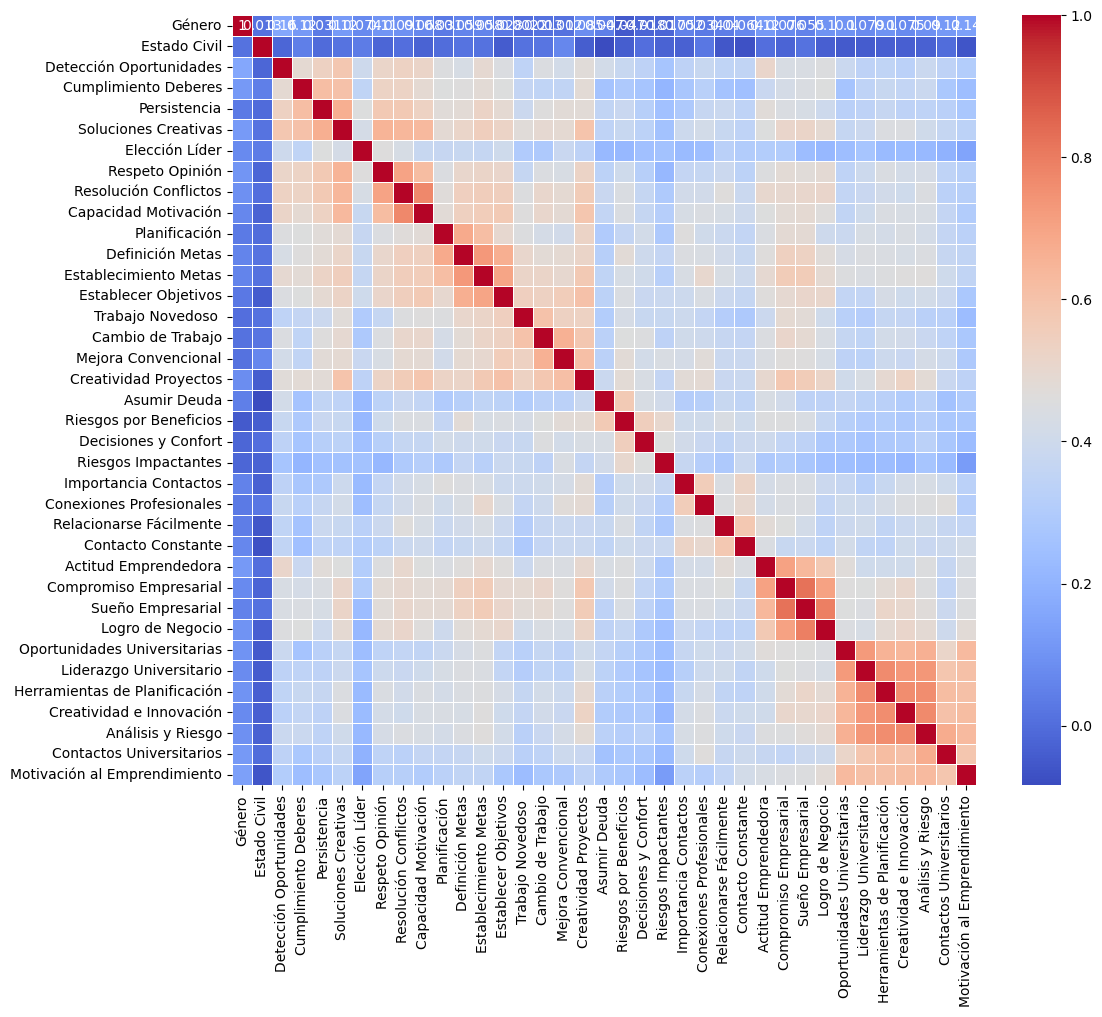

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación
correlation_matrix = x_df.corr()

# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 10))

# Crear el mapa de calor
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Mostrar el gráfico
plt.show()

## Reduccion de caracteristicas con PCA y Preprocesammiento

### Normalizar las caracteristicas

In [14]:
from sklearn import preprocessing
wine_value = df.copy().values
min_max_scaler = preprocessing.MinMaxScaler()
wine_scaled = min_max_scaler.fit_transform(wine_value)
df_scaled = pd.DataFrame(wine_scaled, columns=df.columns)
df_scaled


,Género,Estado Civil,Detección Oportunidades,Cumplimiento Deberes,Persistencia,Soluciones Creativas,Elección Líder,Respeto Opinión,Resolución Conflictos,Capacidad Motivación,...,Sueño Empresarial,Logro de Negocio,Intención de Emprender,Oportunidades Universitarias,Liderazgo Universitario,Herramientas de Planificación,Creatividad e Innovación,Análisis y Riesgo,Contactos Universitarios,Motivación al Emprendimiento
0,1.0,0.5,0.818182,0.818182,0.909091,0.909091,0.909091,0.909091,0.909091,0.909091,...,0.818182,0.909091,0.818182,0.818182,0.636364,0.636364,0.636364,0.636364,0.818182,0.818182
1,1.0,0.5,0.909091,0.818182,0.818182,0.909091,0.909091,0.818182,0.818182,0.818182,...,0.636364,0.818182,0.818182,0.818182,0.636364,0.636364,0.636364,0.636364,0.818182,0.818182
2,0.0,1.0,0.272727,0.272727,0.272727,0.363636,0.272727,0.272727,0.363636,0.272727,...,0.272727,0.272727,0.272727,0.000000,0.000000,0.272727,0.272727,0.272727,0.272727,0.272727
3,0.0,0.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.272727,0.272727,0.272727,...,0.000000,0.272727,0.272727,0.000000,0.000000,0.272727,0.363636,0.272727,0.272727,0.363636
4,0.0,1.0,0.818182,0.818182,0.818182,0.636364,0.636364,0.636364,0.636364,0.636364,...,0.818182,0.818182,0.818182,0.818182,0.818182,0.818182,0.636364,0.636364,0.545455,0.545455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636,1.0,1.0,0.727273,0.727273,0.727273,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
637,1.0,1.0,0.727273,0.727273,0.727273,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
638,0.0,1.0,0.090909,0.090909,0.454545,0.090909,0.454545,0.454545,0.090909,0.090909,...,0.090909,0.090909,0.090909,0.454545,0.454545,0.454545,0.090909,0.090909,0.090909,0.090909
639,1.0,1.0,1.000000,1.000000,1.000000,1.000000,0.545455,0.727273,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.727273,0.727273,0.727273,0.727273,0.727273,0.727273,0.727273


In [15]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641 entries, 0 to 640
Data columns (total 38 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Género                         641 non-null    float64
 1   Estado Civil                   641 non-null    float64
 2   Detección Oportunidades        641 non-null    float64
 3   Cumplimiento Deberes           641 non-null    float64
 4   Persistencia                   641 non-null    float64
 5   Soluciones Creativas           641 non-null    float64
 6   Elección Líder                 641 non-null    float64
 7   Respeto Opinión                641 non-null    float64
 8   Resolución Conflictos          641 non-null    float64
 9   Capacidad Motivación           641 non-null    float64
 10  Planificación                  641 non-null    float64
 11  Definición Metas               641 non-null    float64
 12  Establecimiento Metas          641 non-null    flo

In [16]:
from sklearn.ensemble import RandomForestClassifier

X = df_scaled  # Tus características
y = df["Intención de Emprender"]  # La etiqueta numérica que hemos asignado

clf_rnd = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)
clf_rnd.fit(X, y)

RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=42)

### Usamos random forest para la selección de caracteristicas

In [17]:
# Seleccionamos las características más importantes
feature_importances = {name: score for name, score in zip(list(X), clf_rnd.feature_importances_)}
feature_importances_sorted = pd.Series(feature_importances).sort_values(ascending=False)

In [18]:
feature_importances_sorted

Intención de Emprender           0.288449
Logro de Negocio                 0.103125
Sueño Empresarial                0.069640
Actitud Emprendedora             0.055688
Compromiso Empresarial           0.047912
Motivación al Emprendimiento     0.028329
Creatividad e Innovación         0.020557
Establecimiento Metas            0.018665
Establecer Objetivos             0.017411
Riesgos por Beneficios           0.016476
Mejora Convencional              0.016245
Asumir Deuda                     0.015514
Contacto Constante               0.015510
Análisis y Riesgo                0.015419
Definición Metas                 0.015409
Liderazgo Universitario          0.015252
Elección Líder                   0.014650
Planificación                    0.013964
Herramientas de Planificación    0.013418
Cumplimiento Deberes             0.013264
Contactos Universitarios         0.013113
Creatividad Proyectos            0.013085
Trabajo Novedoso                 0.012821
Relacionarse Fácilmente          0

<Axes: >

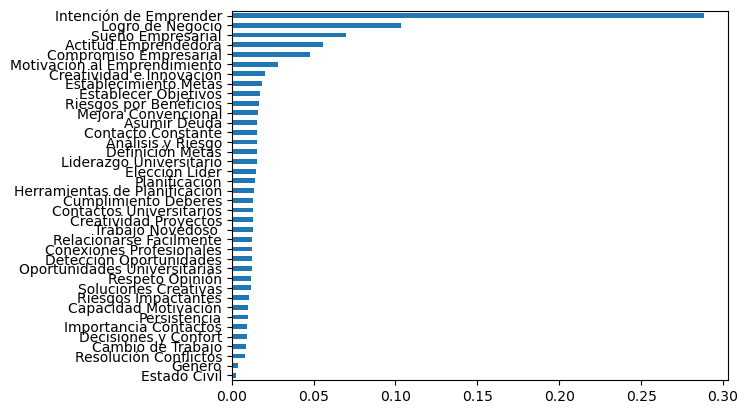

In [19]:
from matplotlib import pyplot as plt
for_plot = pd.DataFrame({'x_axis':X.columns, 'y_axis':feature_importances_sorted}).sort_values(by='y_axis',ascending=True)
for_plot['y_axis'].plot.barh()

In [20]:
'''Reducimos el conjunto de datos a las 8 características las más importantes mirando la imagen anterior
pero vemos adelante que a mayor # de caract. más componenestes y mayor explicabilidad '''
X_reduced = X[list(feature_importances_sorted.head(8).index)].copy()
X_reduced

,Intención de Emprender,Logro de Negocio,Sueño Empresarial,Actitud Emprendedora,Compromiso Empresarial,Motivación al Emprendimiento,Creatividad e Innovación,Establecimiento Metas
0,0.818182,0.909091,0.818182,0.818182,0.818182,0.818182,0.636364,0.818182
1,0.818182,0.818182,0.636364,0.818182,0.818182,0.818182,0.636364,0.818182
2,0.272727,0.272727,0.272727,0.000000,0.272727,0.272727,0.272727,0.363636
3,0.272727,0.272727,0.000000,0.000000,0.000000,0.363636,0.363636,0.272727
4,0.818182,0.818182,0.818182,0.909091,0.818182,0.545455,0.636364,0.818182
...,...,...,...,...,...,...,...,...
636,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
637,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
638,0.090909,0.090909,0.090909,0.090909,0.090909,0.090909,0.090909,0.454545
639,1.000000,1.000000,1.000000,1.000000,1.000000,0.727273,0.727273,1.000000


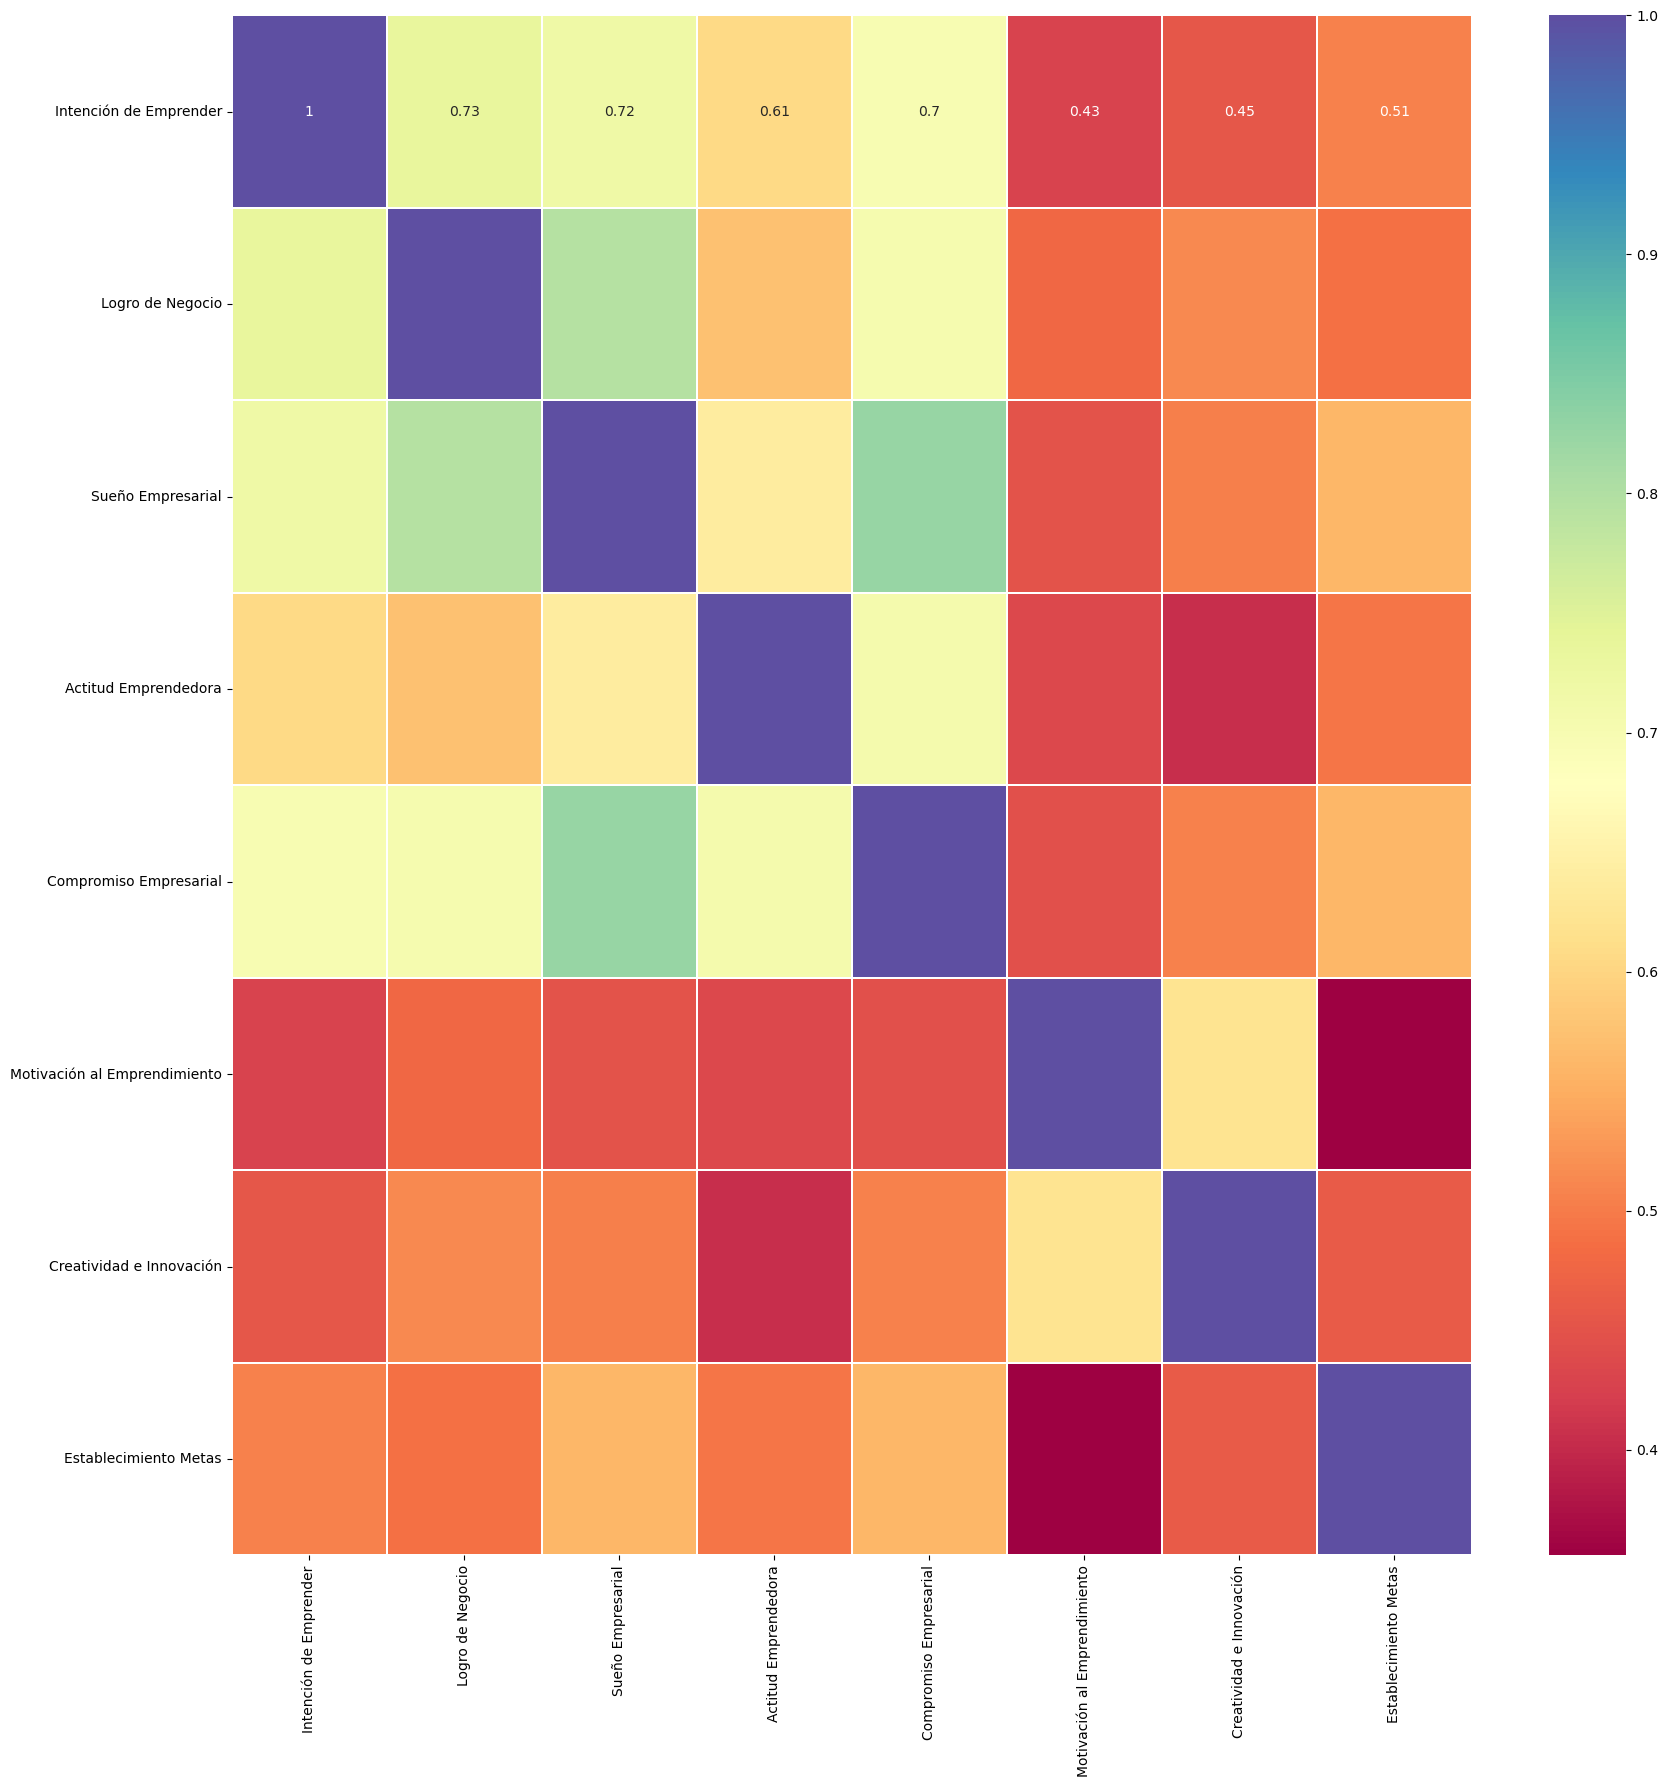

In [21]:
# Volvemos a mirar la correlación de variables mediante heatmap
sns.heatmap(X_reduced.corr(),annot=True, cmap='Spectral', linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(20,20)
plt.show()

In [22]:
X_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641 entries, 0 to 640
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Intención de Emprender        641 non-null    float64
 1   Logro de Negocio              641 non-null    float64
 2   Sueño Empresarial             641 non-null    float64
 3   Actitud Emprendedora          641 non-null    float64
 4   Compromiso Empresarial        641 non-null    float64
 5   Motivación al Emprendimiento  641 non-null    float64
 6   Creatividad e Innovación      641 non-null    float64
 7   Establecimiento Metas         641 non-null    float64
dtypes: float64(8)
memory usage: 40.2 KB


(0.0, 1.0499999999999998)

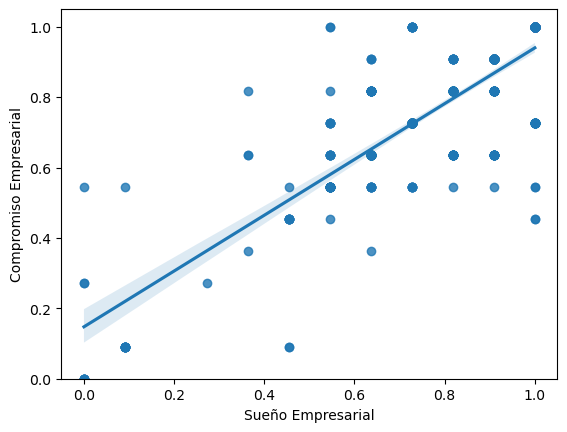

In [23]:
sns.regplot(x="Sueño Empresarial", y="Compromiso Empresarial", data=X_reduced)
plt.ylim(0,)

(0.0, 1.0499999999999998)

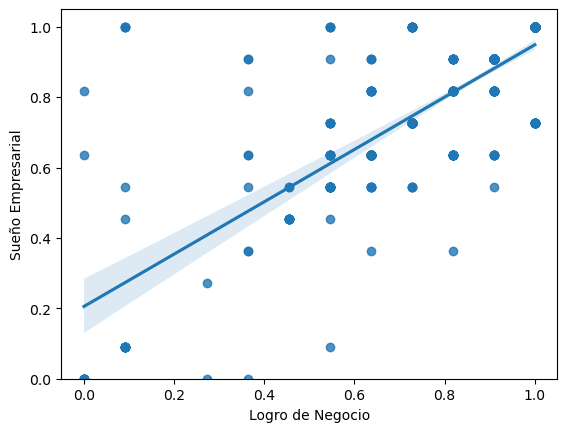

In [24]:
sns.regplot(x="Logro de Negocio", y="Sueño Empresarial", data=X_reduced)
plt.ylim(0,)

In [25]:
#Nuestra variable hipotesis

y_hipo = X_reduced['Intención de Emprender']
x_caracteristicas = X_reduced.drop('Intención de Emprender', axis=1)
x_caracteristicas

,Logro de Negocio,Sueño Empresarial,Actitud Emprendedora,Compromiso Empresarial,Motivación al Emprendimiento,Creatividad e Innovación,Establecimiento Metas
0,0.909091,0.818182,0.818182,0.818182,0.818182,0.636364,0.818182
1,0.818182,0.636364,0.818182,0.818182,0.818182,0.636364,0.818182
2,0.272727,0.272727,0.000000,0.272727,0.272727,0.272727,0.363636
3,0.272727,0.000000,0.000000,0.000000,0.363636,0.363636,0.272727
4,0.818182,0.818182,0.909091,0.818182,0.545455,0.636364,0.818182
...,...,...,...,...,...,...,...
636,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
637,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
638,0.090909,0.090909,0.090909,0.090909,0.090909,0.090909,0.454545
639,1.000000,1.000000,1.000000,1.000000,0.727273,0.727273,1.000000


In [26]:
y_hipo

0      0.818182
1      0.818182
2      0.272727
3      0.272727
4      0.818182
         ...   
636    1.000000
637    1.000000
638    0.090909
639    1.000000
640    1.000000
Name: Intención de Emprender, Length: 641, dtype: float64

In [34]:
import numpy as np
x_definitiva = x_caracteristicas['Logro de Negocio']
x_definitiva = np.array(x_definitiva)
x_definitiva

array([0.90909091, 0.81818182, 0.27272727, 0.27272727, 0.81818182,
       0.63636364, 0.90909091, 0.81818182, 0.81818182, 0.63636364,
       0.81818182, 0.36363636, 0.90909091, 0.81818182, 0.54545455,
       0.63636364, 0.63636364, 0.81818182, 0.90909091, 0.90909091,
       0.63636364, 0.63636364, 0.        , 0.90909091, 0.90909091,
       0.90909091, 0.90909091, 0.63636364, 0.90909091, 0.90909091,
       0.63636364, 0.90909091, 0.81818182, 0.90909091, 0.81818182,
       0.81818182, 0.90909091, 0.63636364, 0.90909091, 0.81818182,
       0.90909091, 0.63636364, 0.81818182, 0.90909091, 0.90909091,
       0.81818182, 0.90909091, 0.90909091, 0.90909091, 0.90909091,
       0.90909091, 0.90909091, 0.63636364, 0.90909091, 0.90909091,
       0.90909091, 0.63636364, 0.90909091, 0.63636364, 0.        ,
       0.90909091, 0.90909091, 0.        , 0.90909091, 0.81818182,
       0.90909091, 0.        , 0.90909091, 0.81818182, 0.90909091,
       0.63636364, 0.81818182, 0.63636364, 0.90909091, 0.54545

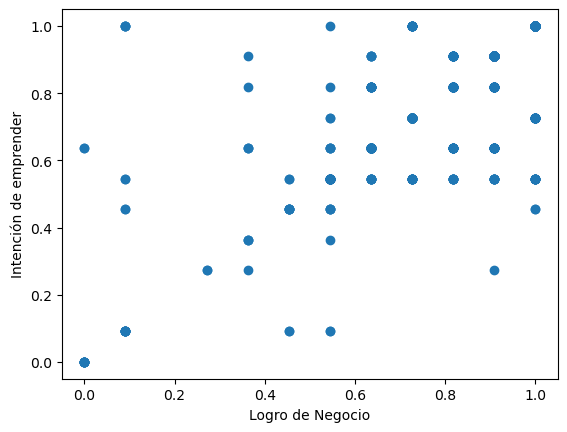

In [35]:
#Graficamos los datos correspondientes
plt.scatter(x_definitiva, y_hipo)
plt.xlabel('Logro de Negocio')
plt.ylabel('Intención de emprender')
plt.show()

## Separación de la data

In [36]:
from sklearn.model_selection import train_test_split
#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(x_definitiva, y_hipo, test_size=0.2)

In [37]:
from sklearn import linear_model

# Creamos el objeto de Regresión Linear
modelo = linear_model.LinearRegression()


In [38]:
# Entrenamos nuestro modelo con los datos de entrenamiento y utilizando la instrucción fit.
modelo.fit(X_train, y_train)

ValueError: Expected 2D array, got 1D array instead:
array=[0.72727273 0.63636364 0.54545455 0.90909091 0.90909091 1.
 1.         0.72727273 0.81818182 0.81818182 0.90909091 0.36363636
 0.90909091 0.90909091 0.54545455 1.         0.63636364 0.72727273
 0.63636364 0.90909091 0.63636364 1.         0.63636364 0.90909091
 0.81818182 1.         0.54545455 0.63636364 0.72727273 0.81818182
 0.63636364 1.         0.90909091 0.72727273 0.72727273 0.09090909
 0.09090909 1.         0.72727273 0.90909091 1.         0.63636364
 1.         0.36363636 0.90909091 1.         0.72727273 0.90909091
 0.63636364 0.63636364 0.81818182 0.90909091 0.90909091 1.
 1.         0.90909091 1.         0.90909091 1.         1.
 0.81818182 0.72727273 1.         0.81818182 1.         0.90909091
 0.90909091 0.72727273 0.90909091 0.90909091 1.         0.90909091
 0.63636364 0.54545455 0.90909091 0.90909091 0.         1.
 0.54545455 1.         0.90909091 0.90909091 0.72727273 0.90909091
 0.54545455 0.63636364 1.         0.81818182 0.63636364 0.90909091
 0.90909091 1.         0.90909091 1.         0.72727273 0.72727273
 0.90909091 1.         0.90909091 1.         0.90909091 0.81818182
 0.90909091 0.90909091 0.90909091 0.72727273 0.72727273 1.
 1.         0.90909091 1.         1.         0.90909091 0.45454545
 0.72727273 1.         0.63636364 1.         0.90909091 1.
 1.         0.54545455 0.81818182 1.         0.54545455 0.90909091
 0.81818182 1.         0.90909091 0.90909091 0.45454545 0.63636364
 0.09090909 0.90909091 0.81818182 0.72727273 0.72727273 0.54545455
 1.         0.90909091 0.09090909 0.90909091 0.81818182 0.81818182
 0.90909091 0.81818182 1.         0.90909091 1.         0.81818182
 0.54545455 0.90909091 1.         0.81818182 0.63636364 0.72727273
 0.63636364 0.63636364 0.09090909 1.         0.90909091 0.54545455
 0.90909091 0.90909091 1.         0.36363636 1.         0.72727273
 0.63636364 0.81818182 0.09090909 0.72727273 0.72727273 0.63636364
 1.         0.81818182 0.81818182 0.81818182 0.09090909 0.
 1.         1.         0.72727273 1.         0.72727273 0.63636364
 1.         0.90909091 0.72727273 0.90909091 0.45454545 0.54545455
 0.81818182 0.90909091 1.         1.         0.90909091 0.90909091
 1.         0.54545455 1.         0.72727273 1.         0.54545455
 1.         0.90909091 0.54545455 0.90909091 0.72727273 0.36363636
 1.         0.90909091 0.90909091 0.90909091 1.         0.81818182
 0.72727273 0.54545455 0.09090909 0.54545455 0.81818182 1.
 0.         0.90909091 0.90909091 0.27272727 1.         1.
 1.         1.         0.         1.         1.         0.54545455
 0.90909091 0.90909091 1.         0.90909091 0.81818182 0.81818182
 0.54545455 0.63636364 1.         0.90909091 1.         0.81818182
 0.63636364 0.54545455 0.81818182 1.         1.         0.72727273
 1.         0.72727273 0.72727273 1.         1.         1.
 1.         0.72727273 0.90909091 0.72727273 1.         0.81818182
 0.54545455 0.81818182 0.72727273 0.54545455 0.90909091 0.90909091
 0.90909091 0.63636364 0.72727273 0.63636364 0.81818182 0.54545455
 0.63636364 1.         0.63636364 0.72727273 1.         0.63636364
 0.45454545 0.72727273 1.         0.63636364 0.63636364 1.
 1.         1.         0.72727273 0.90909091 0.63636364 0.63636364
 1.         0.90909091 0.         0.90909091 1.         0.63636364
 0.72727273 0.72727273 0.81818182 1.         0.90909091 1.
 1.         0.72727273 1.         0.90909091 0.90909091 0.72727273
 0.90909091 0.09090909 0.81818182 1.         1.         0.81818182
 0.90909091 0.72727273 1.         0.63636364 0.90909091 1.
 0.72727273 0.81818182 1.         0.90909091 1.         1.
 0.81818182 0.81818182 1.         0.54545455 0.90909091 0.63636364
 1.         0.90909091 0.63636364 0.54545455 0.90909091 0.72727273
 0.90909091 0.90909091 0.72727273 1.         0.81818182 0.09090909
 0.45454545 0.90909091 0.90909091 0.63636364 0.72727273 0.72727273
 0.09090909 0.90909091 1.         1.         0.81818182 0.90909091
 0.81818182 0.72727273 0.54545455 1.         0.72727273 0.72727273
 0.90909091 0.90909091 0.72727273 0.90909091 0.54545455 0.54545455
 0.90909091 1.         0.72727273 0.90909091 0.90909091 1.
 0.45454545 1.         0.63636364 0.90909091 1.         0.81818182
 0.90909091 0.90909091 1.         0.72727273 0.72727273 1.
 0.63636364 0.90909091 0.63636364 1.         0.81818182 0.09090909
 0.90909091 1.         0.90909091 0.81818182 0.90909091 1.
 0.45454545 1.         0.72727273 0.90909091 0.63636364 0.72727273
 0.90909091 1.         1.         0.72727273 0.72727273 0.72727273
 0.63636364 0.90909091 0.09090909 0.72727273 0.72727273 0.72727273
 0.90909091 0.63636364 0.81818182 0.54545455 1.         0.90909091
 0.72727273 1.         0.90909091 1.         0.72727273 0.54545455
 0.90909091 1.         0.63636364 0.81818182 0.81818182 0.63636364
 1.         0.90909091 0.63636364 0.90909091 1.         0.90909091
 0.90909091 0.90909091 0.90909091 0.90909091 0.81818182 0.63636364
 0.72727273 1.         0.72727273 0.90909091 0.90909091 1.
 1.         1.         0.63636364 1.         0.90909091 0.81818182
 0.36363636 1.         0.72727273 0.72727273 0.72727273 0.90909091
 1.         0.81818182 0.90909091 0.81818182 0.81818182 0.81818182
 0.81818182 0.63636364 0.63636364 0.45454545 1.         1.
 0.54545455 0.81818182 1.         1.         1.         0.90909091
 0.54545455 0.72727273 0.90909091 0.90909091 0.63636364 0.90909091
 0.90909091 0.81818182 1.         0.90909091 0.54545455 0.54545455
 0.90909091 0.63636364 1.         1.         0.36363636 0.54545455
 0.90909091 0.72727273 0.90909091 0.63636364 0.90909091 0.36363636
 1.         0.54545455].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
# Hacemos las predicciones en definitiva una línea 
Y_pred = modelo.predict(X_test)

Realizado todo esto comparemos los valores obtenidos en nuestra predicción con los valores reales, para ver que tal es el comportamiento de nuestro modelo.

In [ ]:
Y_pred

In [ ]:
y_test

In [ ]:
#Graficamos los datos junto con el modelo
plt.scatter(X_test, y_test)
plt.plot(X_test, Y_pred, color='red', linewidth=3)
plt.title('Regresión Lineal Simple')
plt.xlabel('Logro de negocio')
plt.ylabel('Intención de emprender')
plt.show()